# 학습 관련 기술들 실습

1.   과적합(Overfitting)
2.   기울기 소실(Gradient Vanishing)

---


In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb

##1. 과적합 (Overfitting)


IMDB 데이터셋

In [2]:
# import IMDB dataset
NUM_WORDS = 1000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=NUM_WORDS)
word_index = imdb.get_word_index()

In [3]:
# data shape
print('Train data :', train_data.shape)
print('Train labels :', train_labels.shape)
print('Test data :', test_data.shape)
print('Test labels :', test_labels.shape)

Train data : (25000,)
Train labels : (25000,)
Test data : (25000,)
Test labels : (25000,)


In [4]:
test_data = test_data[:1000]
test_labels = test_labels[:1000]

In [5]:
# dataset head
train_data[:5]

array([list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189,

In [6]:
# word embedding list
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

word_index

{'fawn': 34704,
 'tsukino': 52009,
 'nunnery': 52010,
 'sonja': 16819,
 'vani': 63954,
 'woods': 1411,
 'spiders': 16118,
 'hanging': 2348,
 'woody': 2292,
 'trawling': 52011,
 "hold's": 52012,
 'comically': 11310,
 'localized': 40833,
 'disobeying': 30571,
 "'royale": 52013,
 "harpo's": 40834,
 'canet': 52014,
 'aileen': 19316,
 'acurately': 52015,
 "diplomat's": 52016,
 'rickman': 25245,
 'arranged': 6749,
 'rumbustious': 52017,
 'familiarness': 52018,
 "spider'": 52019,
 'hahahah': 68807,
 "wood'": 52020,
 'transvestism': 40836,
 "hangin'": 34705,
 'bringing': 2341,
 'seamier': 40837,
 'wooded': 34706,
 'bravora': 52021,
 'grueling': 16820,
 'wooden': 1639,
 'wednesday': 16821,
 "'prix": 52022,
 'altagracia': 34707,
 'circuitry': 52023,
 'crotch': 11588,
 'busybody': 57769,
 "tart'n'tangy": 52024,
 'burgade': 14132,
 'thrace': 52026,
 "tom's": 11041,
 'snuggles': 52028,
 'francesco': 29117,
 'complainers': 52030,
 'templarios': 52128,
 '272': 40838,
 '273': 52031,
 'zaniacs': 52133,

In [7]:
word_index_r = {v: k for k, v in word_index.items()}
for i, line in enumerate(train_data[:5]):
  print(train_labels[i], [word_index_r[idx] for idx in line])

1 ['<START>', 'this', 'film', 'was', 'just', 'brilliant', 'casting', '<UNK>', '<UNK>', 'story', 'direction', '<UNK>', 'really', '<UNK>', 'the', 'part', 'they', 'played', 'and', 'you', 'could', 'just', 'imagine', 'being', 'there', 'robert', '<UNK>', 'is', 'an', 'amazing', 'actor', 'and', 'now', 'the', 'same', 'being', 'director', '<UNK>', 'father', 'came', 'from', 'the', 'same', '<UNK>', '<UNK>', 'as', 'myself', 'so', 'i', 'loved', 'the', 'fact', 'there', 'was', 'a', 'real', '<UNK>', 'with', 'this', 'film', 'the', '<UNK>', '<UNK>', 'throughout', 'the', 'film', 'were', 'great', 'it', 'was', 'just', 'brilliant', 'so', 'much', 'that', 'i', '<UNK>', 'the', 'film', 'as', 'soon', 'as', 'it', 'was', 'released', 'for', '<UNK>', 'and', 'would', 'recommend', 'it', 'to', 'everyone', 'to', 'watch', 'and', 'the', '<UNK>', '<UNK>', 'was', 'amazing', 'really', '<UNK>', 'at', 'the', 'end', 'it', 'was', 'so', 'sad', 'and', 'you', 'know', 'what', 'they', 'say', 'if', 'you', '<UNK>', 'at', 'a', 'film', 'i

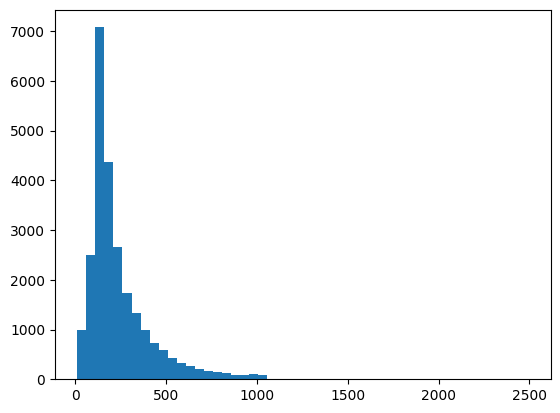

Mean Length : 238.71364


In [8]:
# data length histogram
reviews_length = [len(review) for review in train_data]
plt.hist(reviews_length, bins=50)
plt.show()

print('Mean Length :', np.mean(reviews_length))

In [9]:
# binary encoding
def binary_encoding(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = binary_encoding(train_data, dimension=NUM_WORDS)
test_data = binary_encoding(test_data, dimension=NUM_WORDS)

train_labels = train_labels.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

In [10]:
# data shape after encoding
print('Train data :', train_data.shape)
print('Train labels :', train_labels.shape)
print('Test data :', test_data.shape)
print('Test labels :', test_labels.shape)

Train data : (25000, 1000)
Train labels : (25000, 1)
Test data : (1000, 1000)
Test labels : (1000, 1)


In [11]:
train_data[:5]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

모델 구성 및 훈련

In [12]:
model_small = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_small.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])
model_small.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │           4,004 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,029 (15.74 KB)

 Trainable params: 4,029 (15.74 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history_small = model_small.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 4s - 75ms/step - accuracy: 0.6492 - binary_crossentropy: 0.6588 - loss: 0.6588 - val_accuracy: 0.7620 - val_binary_crossentropy: 0.6064 - val_loss: 0.6064
Epoch 2/20
49/49 - 2s - 50ms/step - accuracy: 0.7915 - binary_crossentropy: 0.5592 - loss: 0.5592 - val_accuracy: 0.8050 - val_binary_crossentropy: 0.5112 - val_loss: 0.5112
Epoch 3/20
49/49 - 0s - 3ms/step - accuracy: 0.8310 - binary_crossentropy: 0.4728 - loss: 0.4728 - val_accuracy: 0.8370 - val_binary_crossentropy: 0.4391 - val_loss: 0.4391
Epoch 4/20
49/49 - 0s - 3ms/step - accuracy: 0.8458 - binary_crossentropy: 0.4113 - loss: 0.4113 - val_accuracy: 0.8440 - val_binary_crossentropy: 0.3895 - val_loss: 0.3895
Epoch 5/20
49/49 - 0s - 6ms/step - accuracy: 0.8556 - binary_crossentropy: 0.3683 - loss: 0.3683 - val_accuracy: 0.8620 - val_binary_crossentropy: 0.3540 - val_loss: 0.3540
Epoch 6/20
49/49 - 0s - 3ms/step - accuracy: 0.8628 - binary_crossentropy: 0.3370 - loss: 0.3370 - val_accuracy: 0.8700 - val_binary_

In [14]:
model_baseline = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_baseline.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])
model_baseline.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │          16,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,305 (63.69 KB)

 Trainable params: 16,305 (63.69 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history_baseline = model_baseline.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 4s - 74ms/step - accuracy: 0.6894 - binary_crossentropy: 0.6165 - loss: 0.6165 - val_accuracy: 0.7940 - val_binary_crossentropy: 0.4904 - val_loss: 0.4904
Epoch 2/20
49/49 - 2s - 51ms/step - accuracy: 0.8366 - binary_crossentropy: 0.4033 - loss: 0.4033 - val_accuracy: 0.8640 - val_binary_crossentropy: 0.3450 - val_loss: 0.3450
Epoch 3/20
49/49 - 0s - 3ms/step - accuracy: 0.8634 - binary_crossentropy: 0.3294 - loss: 0.3294 - val_accuracy: 0.8740 - val_binary_crossentropy: 0.3224 - val_loss: 0.3224
Epoch 4/20
49/49 - 0s - 6ms/step - accuracy: 0.8712 - binary_crossentropy: 0.3113 - loss: 0.3113 - val_accuracy: 0.8630 - val_binary_crossentropy: 0.3174 - val_loss: 0.3174
Epoch 5/20
49/49 - 0s - 3ms/step - accuracy: 0.8743 - binary_crossentropy: 0.3056 - loss: 0.3056 - val_accuracy: 0.8600 - val_binary_crossentropy: 0.3134 - val_loss: 0.3134
Epoch 6/20
49/49 - 0s - 8ms/step - accuracy: 0.8759 - binary_crossentropy: 0.3017 - loss: 0.3017 - val_accuracy: 0.8630 - val_binary_

In [16]:
model_big = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_big.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','binary_crossentropy'])
model_big.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │          64,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,289 (266.75 KB)

 Trainable params: 68,289 (266.75 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history_big = model_big.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 4s - 85ms/step - accuracy: 0.7752 - binary_crossentropy: 0.4779 - loss: 0.4779 - val_accuracy: 0.8620 - val_binary_crossentropy: 0.3357 - val_loss: 0.3357
Epoch 2/20
49/49 - 0s - 3ms/step - accuracy: 0.8634 - binary_crossentropy: 0.3268 - loss: 0.3268 - val_accuracy: 0.8650 - val_binary_crossentropy: 0.3147 - val_loss: 0.3147
Epoch 3/20
49/49 - 0s - 6ms/step - accuracy: 0.8737 - binary_crossentropy: 0.3024 - loss: 0.3024 - val_accuracy: 0.8600 - val_binary_crossentropy: 0.3120 - val_loss: 0.3120
Epoch 4/20
49/49 - 0s - 3ms/step - accuracy: 0.8812 - binary_crossentropy: 0.2901 - loss: 0.2901 - val_accuracy: 0.8590 - val_binary_crossentropy: 0.3170 - val_loss: 0.3170
Epoch 5/20
49/49 - 0s - 6ms/step - accuracy: 0.8871 - binary_crossentropy: 0.2732 - loss: 0.2732 - val_accuracy: 0.8560 - val_binary_crossentropy: 0.3252 - val_loss: 0.3252
Epoch 6/20
49/49 - 0s - 3ms/step - accuracy: 0.8992 - binary_crossentropy: 0.2484 - loss: 0.2484 - val_accuracy: 0.8650 - val_binary_c

모델 비교

In [18]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key], '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])

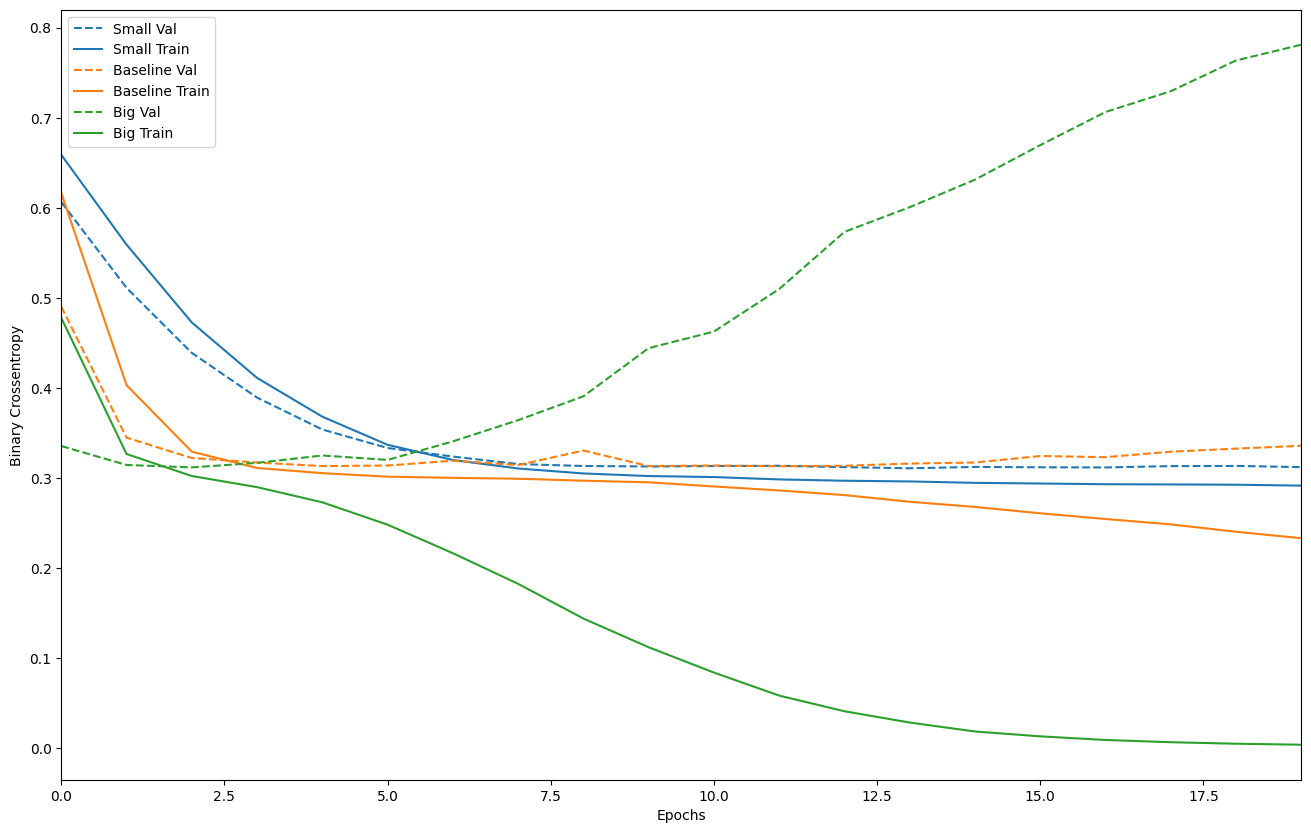

In [19]:
plot_history([('Small', history_small), ('Baseline', history_baseline), ('Big', history_big)])

정규화(Regularization)을 통한 과적합 해결

In [20]:
model_L2 = keras.models.Sequential([
    keras.layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.01),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.01),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_L2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])
history_L2 = model_L2.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 5s - 99ms/step - accuracy: 0.7456 - binary_crossentropy: 0.5397 - loss: 1.5981 - val_accuracy: 0.8470 - val_binary_crossentropy: 0.3846 - val_loss: 0.9572
Epoch 2/20
49/49 - 0s - 3ms/step - accuracy: 0.8525 - binary_crossentropy: 0.3599 - loss: 0.7678 - val_accuracy: 0.8740 - val_binary_crossentropy: 0.3404 - val_loss: 0.6297
Epoch 3/20
49/49 - 0s - 3ms/step - accuracy: 0.8594 - binary_crossentropy: 0.3439 - loss: 0.5772 - val_accuracy: 0.8650 - val_binary_crossentropy: 0.3313 - val_loss: 0.5188
Epoch 4/20
49/49 - 0s - 6ms/step - accuracy: 0.8620 - binary_crossentropy: 0.3350 - loss: 0.4955 - val_accuracy: 0.8700 - val_binary_crossentropy: 0.3249 - val_loss: 0.4612
Epoch 5/20
49/49 - 0s - 7ms/step - accuracy: 0.8650 - binary_crossentropy: 0.3316 - loss: 0.4536 - val_accuracy: 0.8660 - val_binary_crossentropy: 0.3276 - val_loss: 0.4348
Epoch 6/20
49/49 - 0s - 6ms/step - accuracy: 0.8648 - binary_crossentropy: 0.3297 - loss: 0.4287 - val_accuracy: 0.8630 - val_binary_c

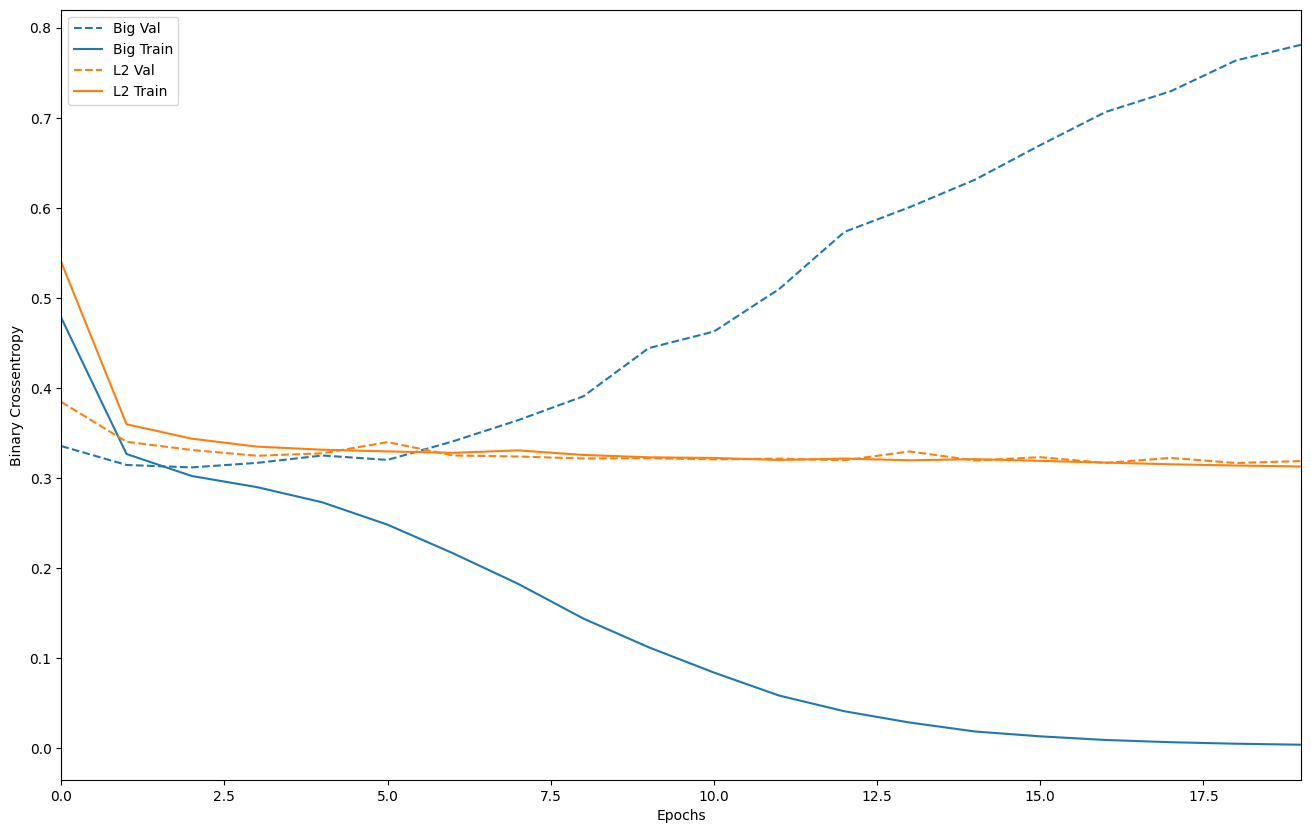

In [21]:
plot_history([('Big', history_big), ('L2', history_L2)])

드롭아웃(Dropout)을 통한 과적합 해결

In [22]:
model_dropout = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.7),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.7),
    keras.layers.Dense(1, activation='sigmoid')
])

model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','binary_crossentropy'])
history_dropout = model_dropout.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 6s - 123ms/step - accuracy: 0.5520 - binary_crossentropy: 0.6918 - loss: 0.6918 - val_accuracy: 0.7540 - val_binary_crossentropy: 0.6404 - val_loss: 0.6404
Epoch 2/20
49/49 - 0s - 4ms/step - accuracy: 0.6796 - binary_crossentropy: 0.5932 - loss: 0.5932 - val_accuracy: 0.8270 - val_binary_crossentropy: 0.4571 - val_loss: 0.4571
Epoch 3/20
49/49 - 0s - 6ms/step - accuracy: 0.7793 - binary_crossentropy: 0.4786 - loss: 0.4786 - val_accuracy: 0.8550 - val_binary_crossentropy: 0.3679 - val_loss: 0.3679
Epoch 4/20
49/49 - 0s - 3ms/step - accuracy: 0.8155 - binary_crossentropy: 0.4222 - loss: 0.4222 - val_accuracy: 0.8640 - val_binary_crossentropy: 0.3323 - val_loss: 0.3323
Epoch 5/20
49/49 - 0s - 6ms/step - accuracy: 0.8306 - binary_crossentropy: 0.3902 - loss: 0.3902 - val_accuracy: 0.8650 - val_binary_crossentropy: 0.3180 - val_loss: 0.3180
Epoch 6/20
49/49 - 0s - 3ms/step - accuracy: 0.8449 - binary_crossentropy: 0.3704 - loss: 0.3704 - val_accuracy: 0.8650 - val_binary_

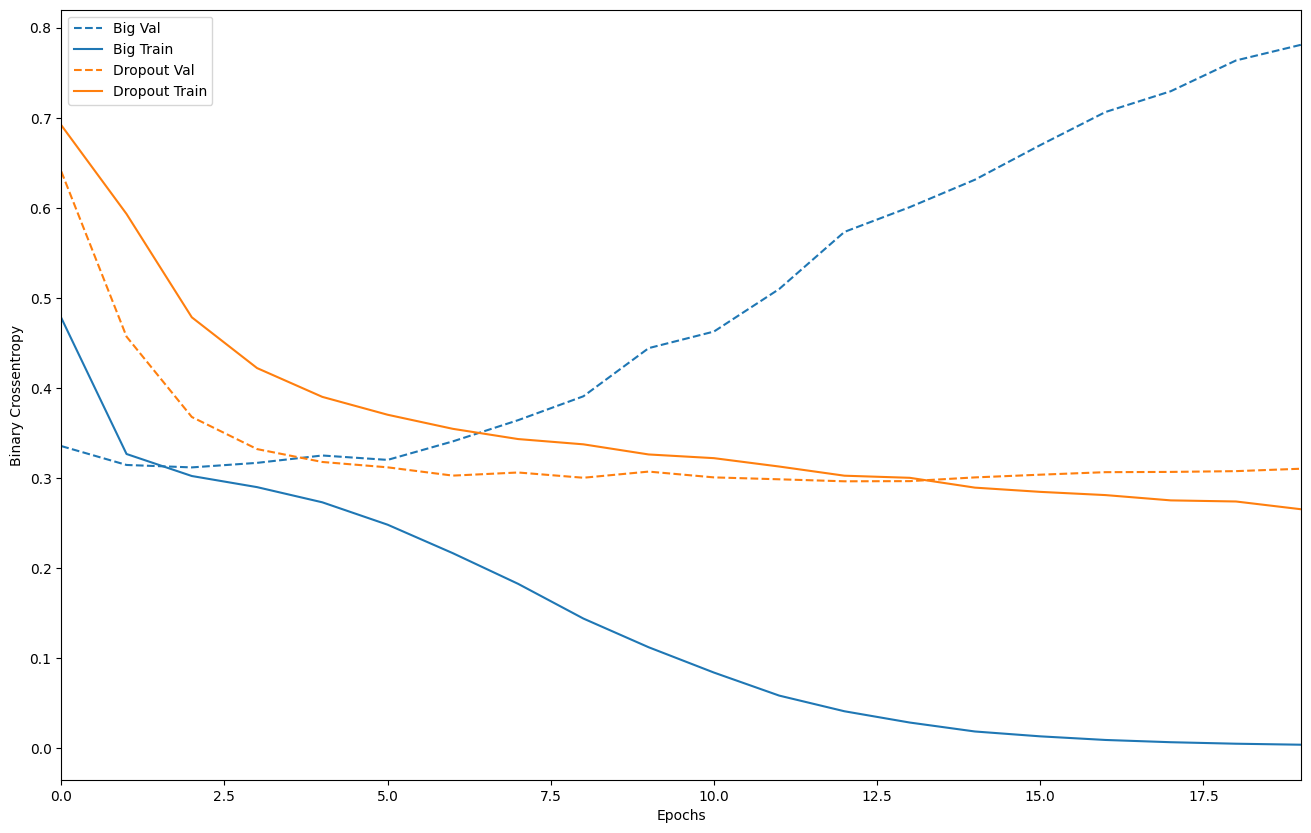

In [23]:
plot_history([('Big', history_big), ('Dropout', history_dropout)])

##2. 기울기 소실 (Gradient Vanishing)

In [24]:
from keras.callbacks import LambdaCallback
# print_weights = LambdaCallback(on_epoch_end=lambda epoch, logs: print('First Layer :\n', model_test.layers[1].get_weights(), '\nLast Layer :\n', model_test.layers[-1].get_weights()))
print_weights = LambdaCallback(on_epoch_end=lambda epoch, logs: log_weights.append([model_test.layers[1].get_weights(), model_test.layers[-1].get_weights()]))

In [25]:
init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)

model_test = keras.Sequential([
    keras.layers.Dense(16, activation='sigmoid', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='sigmoid',  kernel_initializer=init),
    keras.layers.Dense(16, activation='sigmoid',  kernel_initializer=init),
    keras.layers.Dense(16, activation='sigmoid',  kernel_initializer=init),
    keras.layers.Dense(16, activation='sigmoid',  kernel_initializer=init),
    keras.layers.Dense(16, activation='sigmoid',  kernel_initializer=init),
    keras.layers.Dense(16, activation='sigmoid',  kernel_initializer=init),
    keras.layers.Dense(16, activation='sigmoid',  kernel_initializer=init),
    keras.layers.Dense(16, activation='sigmoid',  kernel_initializer=init),
    keras.layers.Dense(16, activation='sigmoid',  kernel_initializer=init),
    keras.layers.Dense(1, activation='sigmoid')
])

log_weights = []
model_test.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])
history_test = model_test.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2, callbacks=[print_weights])

Epoch 1/20
49/49 - 5s - 96ms/step - accuracy: 0.5000 - binary_crossentropy: 0.7359 - loss: 0.7359 - val_accuracy: 0.4740 - val_binary_crossentropy: 0.6972 - val_loss: 0.6972
Epoch 2/20
49/49 - 2s - 42ms/step - accuracy: 0.4994 - binary_crossentropy: 0.6933 - loss: 0.6933 - val_accuracy: 0.5260 - val_binary_crossentropy: 0.6926 - val_loss: 0.6926
Epoch 3/20
49/49 - 0s - 6ms/step - accuracy: 0.4964 - binary_crossentropy: 0.6934 - loss: 0.6934 - val_accuracy: 0.5260 - val_binary_crossentropy: 0.6928 - val_loss: 0.6928
Epoch 4/20
49/49 - 0s - 4ms/step - accuracy: 0.4978 - binary_crossentropy: 0.6933 - loss: 0.6933 - val_accuracy: 0.5260 - val_binary_crossentropy: 0.6922 - val_loss: 0.6922
Epoch 5/20
49/49 - 0s - 6ms/step - accuracy: 0.4962 - binary_crossentropy: 0.6934 - loss: 0.6934 - val_accuracy: 0.5260 - val_binary_crossentropy: 0.6930 - val_loss: 0.6930
Epoch 6/20
49/49 - 0s - 7ms/step - accuracy: 0.4978 - binary_crossentropy: 0.6933 - loss: 0.6933 - val_accuracy: 0.5260 - val_binary_

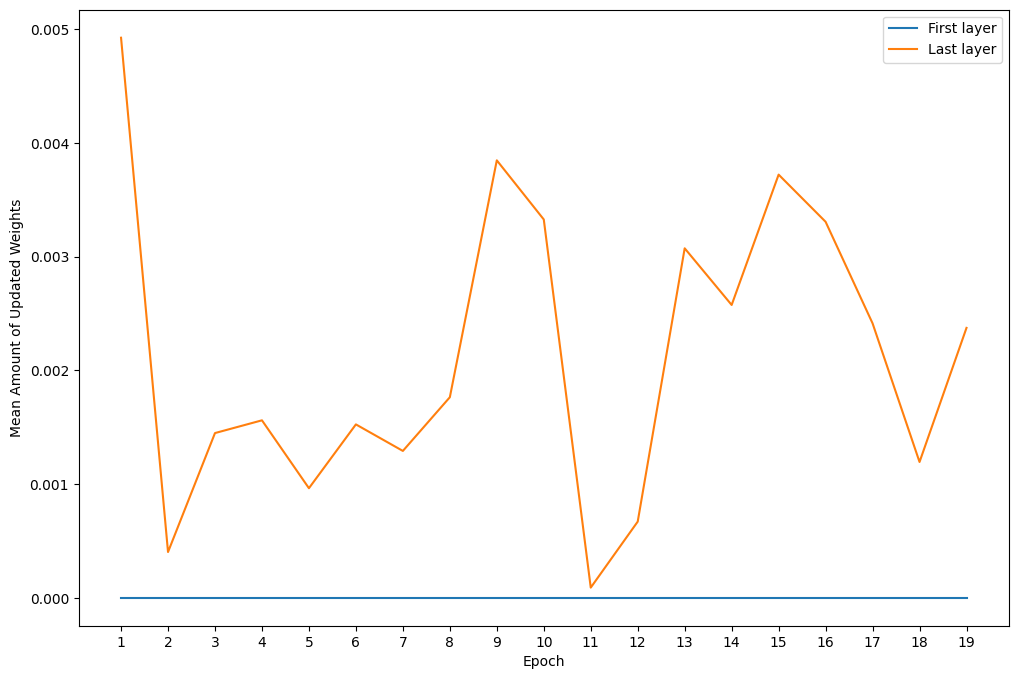

In [26]:
updated_f = []
updated_l = []

for e, log_w in enumerate(log_weights):
  if e==0: continue
  updated_f.append(abs(np.vstack(log_weights[e][0])-np.vstack(log_weights[e-1][0])).mean())
  updated_l.append(abs(np.vstack(log_weights[e][1])-np.vstack(log_weights[e-1][1])).mean())

plt.figure(figsize=(12,8))
plt.plot([i+1 for i in range(0,len(updated_f))], updated_f, label='First layer')
plt.plot([i+1 for i in range(0,len(updated_f))], updated_l, label='Last layer')
plt.xticks([i+1 for i in range(0,len(updated_f))])
plt.xlabel('Epoch')
plt.ylabel('Mean Amount of Updated Weights')
plt.legend()

In [27]:
init = tf.keras.initializers.HeNormal()

model_test = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16, activation='relu',  kernel_initializer=init),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16, activation='relu',  kernel_initializer=init),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16, activation='relu',  kernel_initializer=init),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16, activation='relu',  kernel_initializer=init),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16, activation='relu',  kernel_initializer=init),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16, activation='relu',  kernel_initializer=init),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16, activation='relu',  kernel_initializer=init),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16, activation='relu',  kernel_initializer=init),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16, activation='relu',  kernel_initializer=init),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')
])

log_weights = []
model_test.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])
history_test = model_test.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2, callbacks=[print_weights])

Epoch 1/20
49/49 - 12s - 235ms/step - accuracy: 0.5035 - binary_crossentropy: 0.7332 - loss: 0.7332 - val_accuracy: 0.4890 - val_binary_crossentropy: 0.6941 - val_loss: 0.6941
Epoch 2/20
49/49 - 0s - 5ms/step - accuracy: 0.5384 - binary_crossentropy: 0.6920 - loss: 0.6920 - val_accuracy: 0.5260 - val_binary_crossentropy: 0.6914 - val_loss: 0.6914
Epoch 3/20
49/49 - 0s - 6ms/step - accuracy: 0.5752 - binary_crossentropy: 0.6730 - loss: 0.6730 - val_accuracy: 0.6000 - val_binary_crossentropy: 0.6689 - val_loss: 0.6689
Epoch 4/20
49/49 - 0s - 6ms/step - accuracy: 0.6500 - binary_crossentropy: 0.6211 - loss: 0.6211 - val_accuracy: 0.6740 - val_binary_crossentropy: 0.5977 - val_loss: 0.5977
Epoch 5/20
49/49 - 0s - 6ms/step - accuracy: 0.7303 - binary_crossentropy: 0.5369 - loss: 0.5369 - val_accuracy: 0.7510 - val_binary_crossentropy: 0.5201 - val_loss: 0.5201
Epoch 6/20
49/49 - 0s - 5ms/step - accuracy: 0.7895 - binary_crossentropy: 0.4519 - loss: 0.4519 - val_accuracy: 0.8100 - val_binary

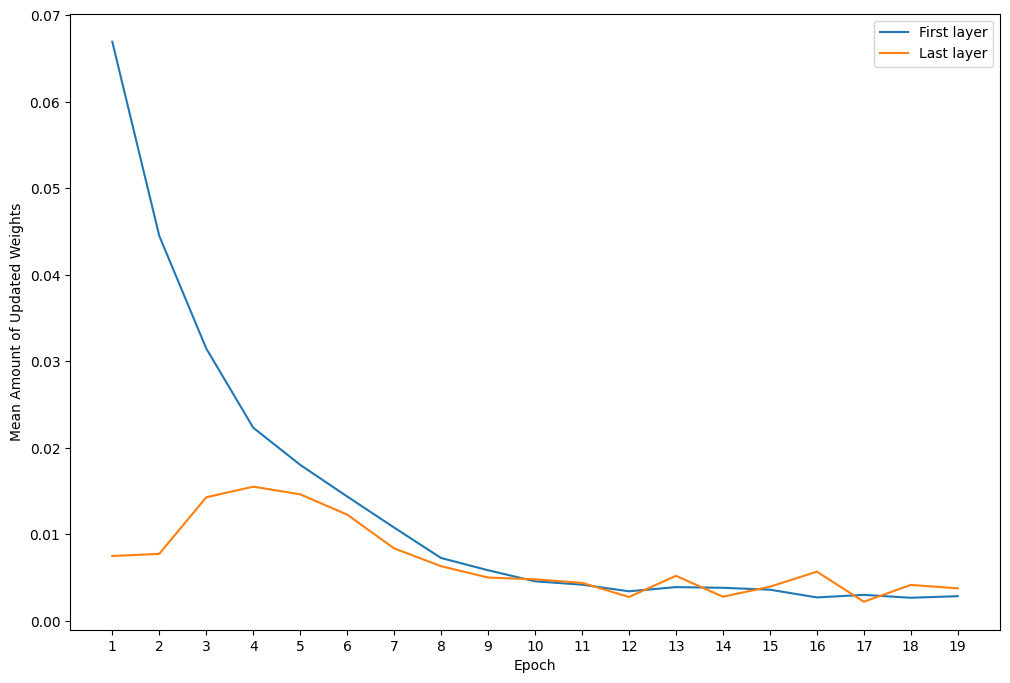

In [28]:
updated_f = []
updated_l = []

for e, log_w in enumerate(log_weights):
  if e==0: continue
  updated_f.append(abs(np.vstack(log_weights[e][0])-np.vstack(log_weights[e-1][0])).mean())
  updated_l.append(abs(np.vstack(log_weights[e][1])-np.vstack(log_weights[e-1][1])).mean())

plt.figure(figsize=(12,8))
plt.plot([i+1 for i in range(0,len(updated_f))], updated_f, label='First layer')
plt.plot([i+1 for i in range(0,len(updated_f))], updated_l, label='Last layer')
plt.xticks([i+1 for i in range(0,len(updated_f))])
plt.xlabel('Epoch')
plt.ylabel('Mean Amount of Updated Weights')
plt.legend()